<a href="https://colab.research.google.com/github/2403A53057/DAV/blob/main/ML_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/gender_submission.csv")

In [ ]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  data[col]=encoder.fit_transform(data[col])

In [ ]:
x= df.iloc[:,0]
y = df.iloc[:,1]

In [ ]:
import numpy as np
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [ ]:
x_train

array([[1228],
       [ 923],
       [ 976],
       [1179],
       [1209],
       [1103],
       [ 986],
       [1281],
       [1219],
       [ 897],
       [ 937],
       [1032],
       [1037],
       [1295],
       [1250],
       [ 908],
       [1278],
       [1016],
       [1217],
       [ 895],
       [ 910],
       [1024],
       [ 952],
       [1090],
       [1224],
       [ 955],
       [1157],
       [1085],
       [1084],
       [1158],
       [1088],
       [1008],
       [ 918],
       [ 899],
       [1142],
       [1138],
       [1000],
       [ 993],
       [1202],
       [ 921],
       [1087],
       [1282],
       [1010],
       [1163],
       [1006],
       [1203],
       [1023],
       [1049],
       [1044],
       [1263],
       [1291],
       [1164],
       [1292],
       [1272],
       [1001],
       [1068],
       [1258],
       [1299],
       [1172],
       [ 975],
       [1065],
       [1254],
       [ 966],
       [1100],
       [1011],
       [1186],
       [10

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(class_weight="balanced")

In [ ]:
model.fit(x_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurracy:",accuracy)

Acurracy: 0.5238095238095238


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Confusion Matrix:")
print("TP FP")
print("FN TN")
print(cm)

Confusion Matrix:
TP FP
FN TN
[[18 16]
 [24 26]]


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [ ]:
precision = precision_score(y_test, y_pred, zero_division=0)
print("Precision:",precision)

Precision: 0.42857142857142855


In [ ]:
recall = recall_score(y_test, y_pred, zero_division=0)
print("Recall:",recall)

Recall: 0.5294117647058824


In [ ]:
f1=f1_score(y_test, y_pred, zero_division=0)
print("F1 Score:",f1)

F1 Score: 0.47368421052631576


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cm=confusion_matrix(y_test,y_pred, labels=[1,0])

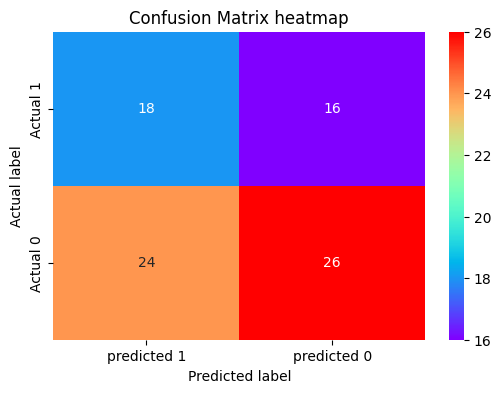

In [64]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow', xticklabels=['predicted 1', 'predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix heatmap')
plt.show()

In [55]:
from sklearn.metrics import roc_curve, auc

In [56]:
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [57]:
roc_auc = auc(fpr, tpr)
print("ROC AUC:",roc_auc)


ROC AUC: 0.5229411764705882


In [65]:
cm=confusion_matrix(y_test,y_pred, labels=[1,0])